# Multi Layer Preceptron (MLP)

In this data we are going to use MLP model for text classification.

## Importing main libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Exploring and Visualizing

Train labels {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


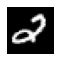

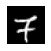

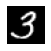

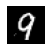

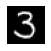

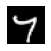

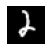

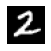

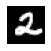

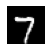

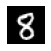

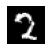

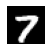

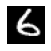

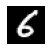

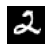

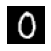

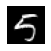

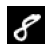

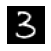

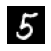

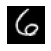

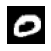

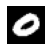

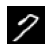

In [2]:
# Count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels", dict(zip(unique, counts)))

# Count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels", dict(zip(unique, counts)))

# Sample from train data set
indexes = np.random.randint(0, x_train.shape[0], size = 25)

images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))

for i in range (len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap = "gray")
    plt.axis("off")
    plt.show()
    plt.close("all")

## Preparing data For Layers

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

# Computing the labels
num_labels = len(np.unique(y_train))

# Convert to one_hot Vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Image Dimension
image_size = x_train.shape[1]
print(image_size)

input_size = image_size * image_size

# Resize and Normalize
x_train = np.reshape(x_train, [-1, input_size]).astype("float32")/255
x_test = np.reshape(x_test, [-1, input_size]).astype("float32")/255

# Network Parameter
batch_size = 128
hidden_unit = 256
dropout = 0.45

28


## Building and Training model

In [4]:
model = Sequential()
model.add(Dense(hidden_unit, input_dim = input_size))
model.add(Activation("relu"))
model.add(Dropout(dropout))

model.add(Dense(hidden_unit))
model.add(Activation("relu"))
model.add(Dropout(dropout))

# This is an output layer
model.add(Dense(num_labels))
model.add(Activation("softmax"))

# Summary of model
model.summary()

# Loss function for one hot vector
# use of adam optimizer
# Accuracy is good metrics for classification task

model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

# Train the network
model.fit(x_train, y_train, batch_size=batch_size, epochs = 20, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

## Visualizing loss and val loss

Note: It shows that if model is overfitting or not.
      If val_loss line is making "U" or went far upward than loss it means the model is overfitting.

<AxesSubplot:>

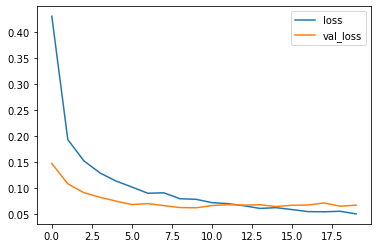

In [5]:
import pandas as pd
history = pd.DataFrame(model.history.history)
history[["loss", "val_loss"]].plot()

## Predicting 

9

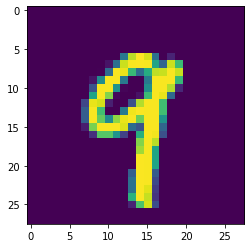

In [6]:
my_number = x_test[558]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1,784)))

6

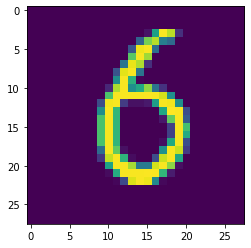

In [7]:
my_number = x_train[9254]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1,784)))

2

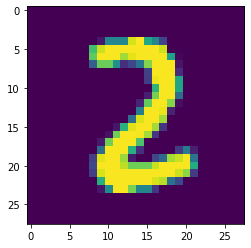

In [8]:
my_number = x_train[18255]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1,784)))